<a href="https://colab.research.google.com/github/KongpobI/Redmi6-review-analyse/blob/main/Redmi6_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redimi6 Review analysis**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("redmi6.csv", encoding='latin-1')
df.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


In [ ]:
df = df[["Review Title","Rating","Category","Comments","Useful"]]
df["Rating"] = df["Rating"].replace({'1.0 out of 5 stars': 1, '2.0 out of 5 stars': 2, '3.0 out of 5 stars': 3
                      , '4.0 out of 5 stars': 4 ,'5.0 out of 5 stars':5})
stars = pd.Series(df["Rating"]).value_counts().reset_index()
stars.columns = ['star', 'count']
stars = stars.sort_values(by='star')

Text(0, 0.5, 'Values')

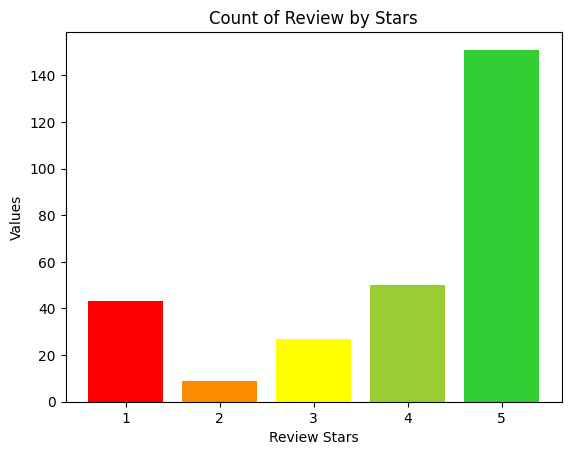

In [ ]:
import matplotlib.pyplot as plt

plt.bar(stars["star"],stars["count"],color = ['red', 'darkorange', 'yellow', 'yellowgreen','limegreen'])
plt.title("Count of Review by Stars")
plt.xlabel('Review Stars')
plt.ylabel('Values')

**1. Use VADER lexicon in NLTK library for sentiment analysis**

---



In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Download VADER lexicon (required for sentiment analysis)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiments = {}

def stm(text) :
    sentiments[id] = sia.polarity_scores(text)

for i in range(len(df["Comments"])) :
    sentiments[i] = sia.polarity_scores(df["Comments"][i])

score = pd.DataFrame(sentiments).T
df[["neg","neu","pos","compound"]] = score
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review Title,Rating,Category,Comments,Useful,neg,neu,pos,compound
0,Another Midrange killer Smartphone by Xiaomi,4,Display,Another Midrange killer Smartphone by Xiaomi\n...,,0.040,0.818,0.142,0.9981
1,vry small size mobile,3,Others,All ok but vry small size mobile,7 people found this helpful,0.000,0.789,0.211,0.1531
2,Full display not working in all application.,3,Others,Quite good,7 people found this helpful,0.000,0.238,0.762,0.4927
3,Value for Money,5,Display,Redmi has always have been the the king of bud...,2 people found this helpful,0.029,0.815,0.155,0.9610
4,Not worth for the money,2,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,0.366,0.552,0.083,-0.7677


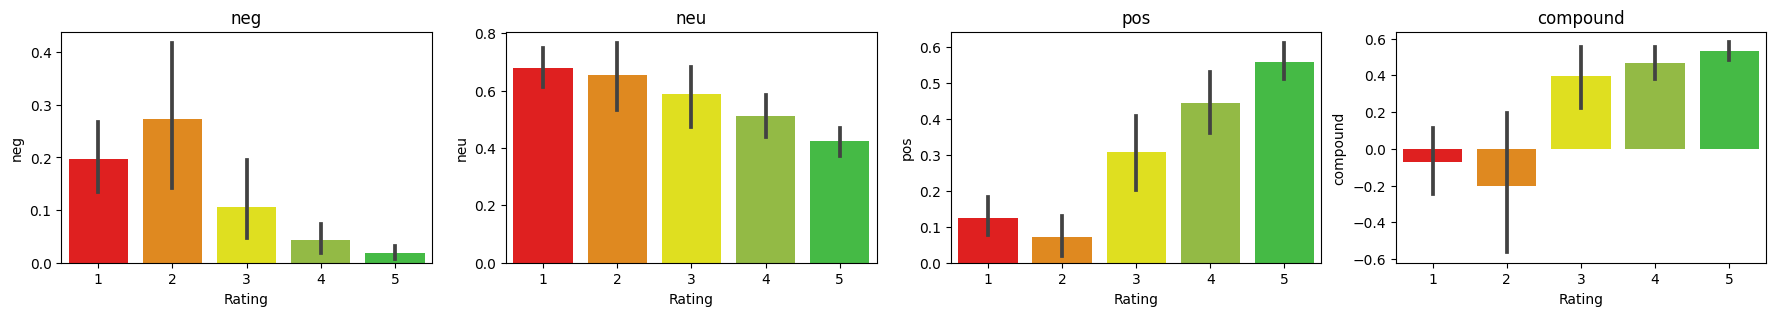

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(1,4,figsize=(22,3)) # 2 row, 4 columns of subplots
sns.barplot(data=df,x=df["Rating"],y=df["neg"],ax=axs[0],palette=['red', 'darkorange', 'yellow', 'yellowgreen','limegreen'])
sns.barplot(data=df,x=df["Rating"],y=df["neu"],ax=axs[1],palette=['red', 'darkorange', 'yellow', 'yellowgreen','limegreen'])
sns.barplot(data=df,x=df["Rating"],y=df["pos"],ax=axs[2],palette=['red', 'darkorange', 'yellow', 'yellowgreen','limegreen'])
sns.barplot(data=df,x=df["Rating"],y=df["compound"],ax=axs[3],palette=['red', 'darkorange', 'yellow', 'yellowgreen','limegreen'])
axs[0].set_title("neg")
axs[1].set_title("neu")
axs[2].set_title("pos")
axs[3].set_title("compound")

plt.show()

Text(0.5, 1.0, 'compound for each categories')

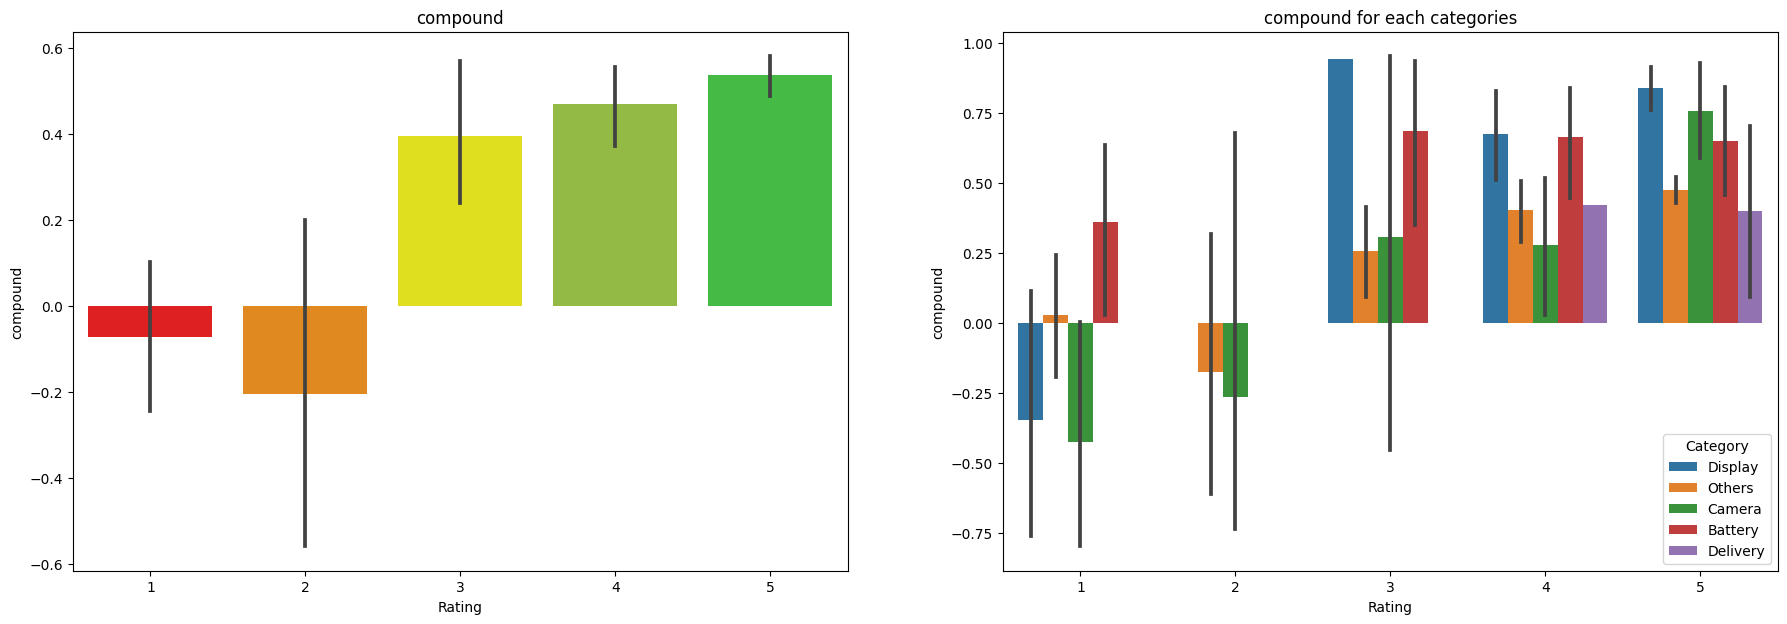

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(22,7)) # 2 row, 4 columns of subplots
sns.barplot(data=df,x=df["Rating"],y=df["compound"],ax=axs[0],palette=['red', 'darkorange', 'yellow', 'yellowgreen','limegreen'])
sns.barplot(data=df,x=df["Rating"],y=df["compound"],ax=axs[1],hue = df["Category"])
axs[0].set_title("compound")
axs[1].set_title("compound for each categories")


**2. Train SVM model for classified review by stars/categories**

---










In [ ]:
dfSVM = df[["Rating",'Comments','Category']]
dfSVM.head(2)

,Rating,Comments,Category
0,4,Another Midrange killer Smartphone by Xiaomi\n...,Display
1,3,All ok but vry small size mobile,Others


In [ ]:
!python -m spacy download en_core_web_md

2023-10-31 15:21:48.087979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 15:21:48.088026: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 15:21:48.088064: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 15:21:48.095898: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 15:21:49.190804: W tensorflow/compiler/

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

x,y = dfSVM["Comments"],dfSVM[["Rating",'Category']]
#แบ่ง dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

import spacy
nlp = spacy.load("en_core_web_md") # Load the medium-sized spaCy English model with word vectors

In [ ]:
#ทำข้อมูลให้เป็นvector ด้วย modelจากspacy
x_trainVec = x_train.apply(lambda x: nlp(x).vector  )
x_testVec = x_test.apply(lambda x: nlp(x).vector )

In [ ]:
#create SVM model for predict stars
from sklearn.svm import SVC
svmStar1 = SVC(kernel='linear')
svmStar1.fit(x_trainVec.tolist(), y_train["Rating"].tolist())

#create SVM model for predict categories
svmCate1 = SVC(kernel='linear')
svmCate1.fit(x_trainVec.tolist(), y_train["Category"].tolist())

SVC(kernel='linear')

In [ ]:
y_predStar  =svmStar1.predict(x_testVec.tolist())
y_predCate = svmCate1.predict(x_testVec.tolist())
pd.DataFrame({"Pred Stars":y_predStar, "Actual Stars":y_test["Rating"], "Pred Category":y_predCate, "Actual Category":y_test["Category"]}).reset_index()

,index,Pred Stars,Actual Stars,Pred Category,Actual Category
0,33,1,1,Others,Others
1,108,5,4,Others,Camera
2,240,5,5,Display,Display
3,259,5,4,Others,Others
4,154,5,4,Others,Others
5,9,1,5,Others,Others
6,146,4,4,Battery,Others
7,203,5,5,Others,Others
8,144,5,5,Others,Others
9,155,5,5,Others,Others


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

acS , acC = accuracy_score(y_test["Rating"].tolist(), y_predStar) , accuracy_score(y_test["Category"].tolist(), y_predCate)
f1S = f1_score(y_test["Rating"].tolist(), y_predStar, average='weighted')
f1C = f1_score(y_test["Category"].tolist(), y_predCate, average='weighted')
print("------------------------------Predict Stars Model-------------------------------")
print("accuracy :",acS)
print("f1 :",f1S)
print("------------------------------Predict Categories Model-------------------------------")
print("accuracy :",acC)
print("f1 :",f1C)

------------------------------Predict Stars Model-------------------------------
accuracy : 0.5535714285714286
f1 : 0.5469165927240461
------------------------------Predict Categories Model-------------------------------
accuracy : 0.625
f1 : 0.6625783646792051


จากทั้ง2Modelจะเห็นว่า accuracy ,f1 score ค่อนข้างน้อย นั่นคือModelทำงานได้ไม่ค่อยมีประสิทธิภาพมากนัก(predict ถูกบ้างผิดบ้าง) อาจเกิดจาก จน.dataที่ใช้trainน้อยไป ,data ที่ได้มาค่อยข้างcomplexสูงควรใช้modelตัวอื่น หรือcleansing dataเพิ่มเติม ,model ที่ใช้ทำword vectorอาจไม่ได้specificกับงานนี้มากนัก

In [ ]:
#Save
import pickle
with open('SVM_model.pkl', 'wb') as model_file:
    pickle.dump(svmStar1, model_file)
    print("Saved")

Saved


**3. RoBERTa model**

---



In [ ]:
!pip install transformers
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.0 MB/s eta 0:00:00


In [ ]:
dfForROBERTA = df[["Comments","Rating","Category"]]
dfForROBERTA['Category'].unique()

array(['Display', 'Others', 'Camera', 'Battery', 'Delivery'], dtype=object)

In [ ]:
#Let ['Display', 'Others', 'Camera', 'Battery', 'Delivery'] = [0,1,2,3,4]
cate = {'Display':0,'Others':1,'Camera':2,'Battery':3,'Delivery':4}

In [ ]:
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)
# Setting up the device for GPU usage
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
new_df = dfForROBERTA
new_df["Rating"] = dfForROBERTA["Rating"].replace({1: 0, 2: 1,3: 2
                      , 4: 3 ,5:4})
new_df["Category"] = dfForROBERTA["Category"].replace(cate)
new_df

<ipython-input-24-8f998b612e41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Rating"] = dfForROBERTA["Rating"].replace({1: 0, 2: 1,3: 2
<ipython-input-24-8f998b612e41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Category"] = dfForROBERTA["Category"].replace(cate)


,Comments,Rating,Category
0,Another Midrange killer Smartphone by Xiaomi\n...,3,0
1,All ok but vry small size mobile,2,1
2,Quite good,2,1
3,Redmi has always have been the the king of bud...,4,0
4,worst product from MI. I am a hardcore fan of ...,1,1
...,...,...,...
275,"I like This Phone, Awesome look and design.\nI...",4,1
276,Product is avasome but invoice is note include...,3,1
277,"Redmi Note4, Note5, now 6pro..It seems the old...",2,3
278,I love mi,4,1


In [ ]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
# EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)

In [ ]:
class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.Comments
        self.targets = self.data.Rating
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_size = 0.8
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = SentimentData(train_data, tokenizer, MAX_LEN)
testing_set = SentimentData(test_data, tokenizer, MAX_LEN)

FULL Dataset: (280, 3)
TRAIN Dataset: (224, 3)
TEST Dataset: (56, 3)


In [ ]:
train_data

,Comments,Rating,Category
0,Battery and camera,4,3
1,"Awesome sound quality , battery life is good ,...",2,3
2,Good,4,1
3,after using two weeks i just analyse that it i...,2,3
4,Bad experience ever battery% doesn't show.Low ...,0,0
...,...,...,...
219,I've fallen in love!,4,1
220,Nice mobaile,2,1
221,Ok,4,1
222,I have fall in love,4,1


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

Creating the Neural Network for Fine Tuning

In [ ]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 5)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
model = RobertaClass()
model.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

Fine Tuning the Model

In [ ]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

In [ ]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calcuate_accuracy(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)

        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return

In [ ]:
EPOCHS = 10
for epoch in range(EPOCHS):
    train(epoch)

0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
1it [00:03,  3.94s/it]

Training Loss per 5000 steps: 1.6013188362121582
Training Accuracy per 5000 steps: 12.5


28it [00:12,  2.21it/s]


The Total Accuracy for Epoch 0: 50.44642857142857
Training Loss Epoch: 1.4371958545276098
Training Accuracy Epoch: 50.44642857142857


0it [00:00, ?it/s]

Training Loss per 5000 steps: 1.1329052448272705
Training Accuracy per 5000 steps: 62.5


28it [00:08,  3.15it/s]


The Total Accuracy for Epoch 1: 54.017857142857146
Training Loss Epoch: 1.2398390918970108
Training Accuracy Epoch: 54.017857142857146


1it [00:00,  3.35it/s]

Training Loss per 5000 steps: 1.1269203424453735
Training Accuracy per 5000 steps: 50.0


28it [00:09,  3.08it/s]


The Total Accuracy for Epoch 2: 54.017857142857146
Training Loss Epoch: 1.1885098878826414
Training Accuracy Epoch: 54.017857142857146


1it [00:00,  3.21it/s]

Training Loss per 5000 steps: 1.3562922477722168
Training Accuracy per 5000 steps: 50.0


28it [00:09,  3.08it/s]


The Total Accuracy for Epoch 3: 55.357142857142854
Training Loss Epoch: 1.0995221734046936
Training Accuracy Epoch: 55.357142857142854


1it [00:00,  3.27it/s]

Training Loss per 5000 steps: 0.9186815619468689
Training Accuracy per 5000 steps: 62.5


28it [00:09,  3.04it/s]


The Total Accuracy for Epoch 4: 61.607142857142854
Training Loss Epoch: 0.9613352758543832
Training Accuracy Epoch: 61.607142857142854


1it [00:00,  3.15it/s]

Training Loss per 5000 steps: 0.6995848417282104
Training Accuracy per 5000 steps: 87.5


28it [00:09,  3.01it/s]


The Total Accuracy for Epoch 5: 68.75
Training Loss Epoch: 0.8771999627351761
Training Accuracy Epoch: 68.75


1it [00:00,  3.18it/s]

Training Loss per 5000 steps: 0.8732082843780518
Training Accuracy per 5000 steps: 62.5


28it [00:09,  2.98it/s]


The Total Accuracy for Epoch 6: 74.10714285714286
Training Loss Epoch: 0.7328303083777428
Training Accuracy Epoch: 74.10714285714286


1it [00:00,  3.11it/s]

Training Loss per 5000 steps: 1.1169770956039429
Training Accuracy per 5000 steps: 50.0


28it [00:09,  2.94it/s]


The Total Accuracy for Epoch 7: 78.125
Training Loss Epoch: 0.6187767519482544
Training Accuracy Epoch: 78.125


1it [00:00,  3.07it/s]

Training Loss per 5000 steps: 0.30774739384651184
Training Accuracy per 5000 steps: 87.5


28it [00:09,  2.91it/s]


The Total Accuracy for Epoch 8: 87.5
Training Loss Epoch: 0.48773510062268804
Training Accuracy Epoch: 87.5


1it [00:00,  3.01it/s]

Training Loss per 5000 steps: 0.597630500793457
Training Accuracy per 5000 steps: 87.5


28it [00:09,  2.86it/s]

The Total Accuracy for Epoch 9: 87.5
Training Loss Epoch: 0.41574384006006376
Training Accuracy Epoch: 87.5


Validating the Model

In [ ]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)

            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")

    return epoch_accu

In [ ]:
acc = valid(model, testing_loader)
print("Accuracy on test data = ", acc, "%")

3it [00:00, 12.41it/s]

Validation Loss per 100 steps: 0.7546964287757874
Validation Accuracy per 100 steps: 75.0


14it [00:00, 15.61it/s]

Validation Loss Epoch: 0.7957803261067186
Validation Accuracy Epoch: 75.0
Accuracy on test data =  75.0 %



---
Accuracy สูงกว่าmodel ก่อนหน้ามาก


In [ ]:
#Save
output_model_file = 'pytorch_roberta_sentiment.bin'
output_vocab_file = './'

model_to_save = model
torch.save(model_to_save, output_model_file)
tokenizer.save_vocabulary(output_vocab_file)

print('All files saved')

All files saved


In [ ]:
import torch

def encode_new_input(tokenizer, model, new_input_text, max_len, device='cpu'):
    new_input = " ".join(new_input_text.split())
    inputs = tokenizer.encode_plus(
        new_input,
        None,
        add_special_tokens=True,
        max_length=max_len,
        pad_to_max_length=True,
        return_token_type_ids=True
    )
    ids = torch.tensor(inputs['input_ids'], dtype=torch.long, device=device)
    mask = torch.tensor(inputs['attention_mask'], dtype=torch.long, device=device)
    token_type_ids = torch.tensor(inputs["token_type_ids"], dtype=torch.long, device=device)

    # Use the model to make predictions
    with torch.no_grad():
        inputs = {
            'input_ids': ids.unsqueeze(0),
            'attention_mask': mask.unsqueeze(0),
            'token_type_ids': token_type_ids.unsqueeze(0)
        }
        inputs = {key: value.to(device) for key, value in inputs.items()}
        outputs = model(**inputs)

    # Get the model's output tensor
    output_tensor = outputs.logits if hasattr(outputs, 'logits') else outputs

    # Apply softmax to get probabilities
    probabilities = torch.softmax(output_tensor, dim=-1)

    # Get the star rating with the highest probability
    predicted_star = torch.argmax(probabilities).item() + 1  # Add 1 to convert from 0-based index to 1-based star rating

    return predicted_star

#Input text
new_input_text = "Good very good this is the good one i really recommend it for my friend and family."

model = torch.load('pytorch_roberta_sentiment.bin')
max_len = 256

device = 'cuda:0'
predicted_star = encode_new_input(tokenizer, model, new_input_text, max_len, device=device)
print("Predicted Star Rating:", predicted_star)


Predicted Star Rating: 5




---
จากข้างบนจะได้ค่า accuracy ของ RoBERTa model มากกว่า SVM model โดยที่

*   SVM : accuracy 55%
*   RoBERTa : accuracy 75%


